<a href="https://colab.research.google.com/github/janeusz2000/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook settings

In [382]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as lines
from matplotlib.ticker import MaxNLocator


plt.style.use('ggplot')

custom_color = [
    '#EDC7B7',
    '#EEE2DC',
    '#BAB2B5',
    '#123C69',
    '#AC3B61'
]

plt.rcParams['figure.figsize'] = (9,7)
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = custom_color[3]
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'
plt.rcParams["font.family"] = "monospace"

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 1

# Kaggle Integration

In [383]:
from google.colab import files
files.upload() # add .json file with token obtained from kaggle

# dont forget to rename it into kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [384]:
!kaggle competitions download -c 'titanic'


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [385]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# DATA TEST

In [386]:
import pandas as pd

from pathlib import Path

## How data is structured

In [387]:
testFile = Path("train.csv")
trainFile = Path("test.csv")

assert(trainFile.exists())
train_table = pd.read_csv(testFile)
test_table = pd.read_csv(trainFile)
pd.options.display.max_columns = len(train_table.columns)
train_table.head(900)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Age Analisis

In [388]:
import math

def count_age(pandasTable) -> dict:
    output = dict()
    for age in pandasTable["Age"]:
        if math.isnan(age):
            continue
        if age in output.keys():
            output[age] += 1
        else:
            output[age] = 1
    return output

def count_age_by_decades(pandasTable) -> dict:
    output = dict()
    for age in pandasTable["Age"]:
        if math.isnan(age):
            continue
        
        age_casted_to_decades = age // 10
        if age_casted_to_decades in output.keys():
            output[age_casted_to_decades] += 1
        else:
            output[age_casted_to_decades] = 1
    return output


In [389]:
survived = train_table[train_table["Survived"] == 1]
not_survived = train_table[train_table["Survived"] == 0]
full_age = train_table

In [390]:
survived_count = count_age(survived)
not_survived_count = count_age(not_survived)
full_count = count_age(full_age)

survived_count_decades = count_age_by_decades(survived)
not_survived_count_decades = count_age_by_decades(not_survived)
full_count_decades = count_age_by_decades(full_age)

In [391]:
def get_survability_percent_per_age(age_counts, full_count):
    output = dict()
    for age_count in age_counts:
        full = full_count[age_count]
        value = age_counts[age_count]
        output[age_count] = float(value) / float(full) * 100
    return output

survived_population = get_survability_percent_per_age(survived_count, full_count)
non_survived_population = get_survability_percent_per_age(not_survived_count, full_count)
survived_population_by_decades = get_survability_percent_per_age(survived_count_decades, full_count_decades)
non_survived_population_by_decades = get_survability_percent_per_age(not_survived_count_decades, full_count_decades)

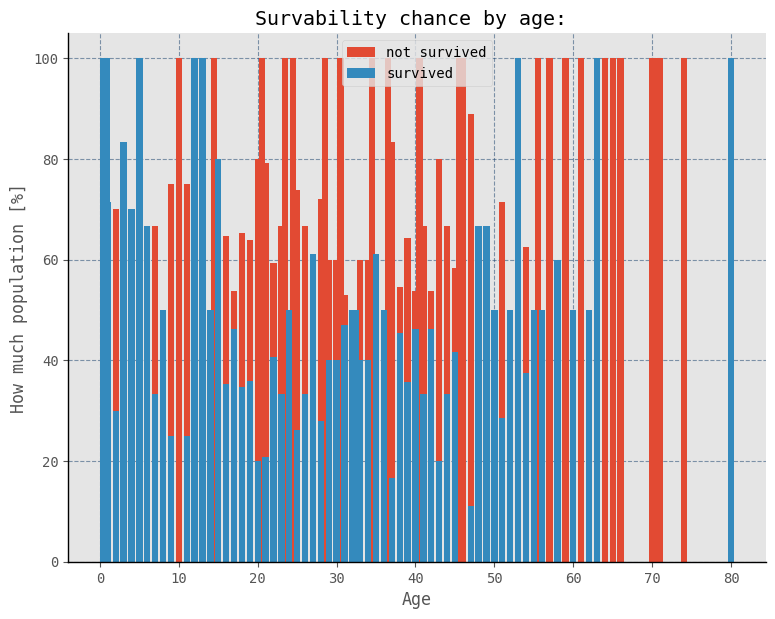

In [392]:
plt.bar([float(number) for number in non_survived_population.keys()], [float(number) for number in non_survived_population.values()])
plt.bar(survived_population.keys(), survived_population.values())
plt.title("Survability chance by age: ")
plt.xlabel("Age")
plt.ylabel("How much population [%]")
plt.legend(["not survived", "survived"])
plt.show()

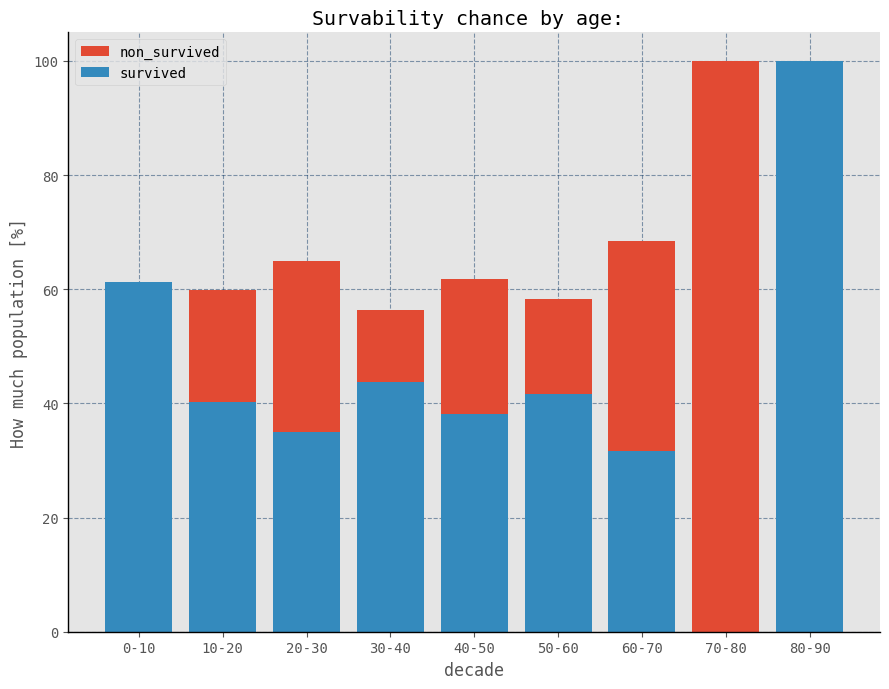

In [393]:
fig, ax = plt.subplots()
ax.bar(non_survived_population_by_decades.keys(), non_survived_population_by_decades.values(), label="non_survived")
ax.bar(survived_population_by_decades.keys(), survived_population_by_decades.values(), label="survived")

ticks = set(non_survived_population_by_decades.keys())
ticks.update(survived_population_by_decades.keys())

ax.set_title("Survability chance by age: ")
ax.set_xlabel("decade")
ax.set_ylabel("How much population [%]")
ax.legend()
labels = [f"{int(decade)*10}-{(int(decade)+1)*10}" for decade in ticks]

ax.set_xticks(list(ticks))
ax.set_xticklabels(labels)

plt.tight_layout()

plt.show()

## Sex Analisis

In [394]:
men_survived = len(survived[survived['Sex'] == "male"])
full_men = len(train_table[train_table['Sex'] == "male"])

woman_survived = len(survived[survived['Sex'] == "female"])
full_woman = len(train_table[train_table['Sex'] == "female"])
print(f"{men_survived} out of {full_men} men survived")
print(f"{woman_survived} out of {full_woman} woman survived")

109 out of 577 men survived
233 out of 314 woman survived


##Location Analisis

In [403]:
train_known_location = train_table[pd.isna(train_table["Cabin"]) == False]
train_known_location.head(900)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


204


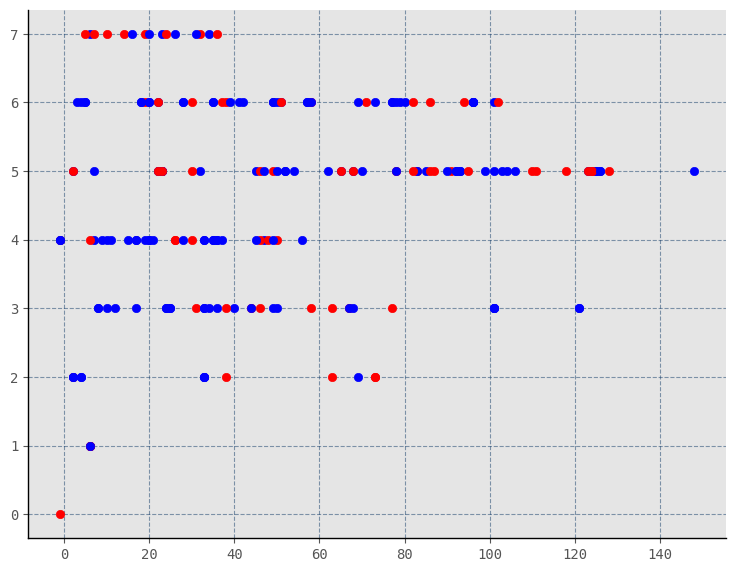

In [404]:
def get_position(input_str: str):
    cabin = input_str
    cabin = cabin.replace(" ", "")
    if not cabin:
        return -1
    if cabin[0] in ["G", "E"]:
        cabin = cabin[1:]
    number_of_characters_eaten = 0
    initial_cabin_length = len(cabin)
    operated = cabin
    while not operated.isnumeric():
        if number_of_characters_eaten >= initial_cabin_length:
            assert(False)

        operated = operated[0: -1]

        number_of_characters_eaten += 1
    return int(operated)

def plot_survability_based_on_location(train_table_with_known_locations: pd.DataFrame):
    output = dict()
    number = 0
    dec_level = {"A" : 7, "B" : 6, "C" : 5, "D" : 4, "E" : 3, "F" : 2, "G" : 1, "T" : 0}
    for index, row in train_table_with_known_locations.iterrows():
        number += 1
        survived = row['Survived']
        cabin = row['Cabin']
        name = row['Name']

        dec = dec_level[cabin[0]]

        position = get_position(cabin[1:])
        
        if survived:
            plt.scatter(x=position, y=dec, color='blue')
        else:
            plt.scatter(x=position, y=dec, color='red')

    print(number)
    plt.show()


plot_survability_based_on_location(train_known_location)
# train_known_location["Cabin"].transform(lambda x: print(x))

##Fare Analisis

In [397]:
fare_survived = train_table[['Survived', 'Fare']]

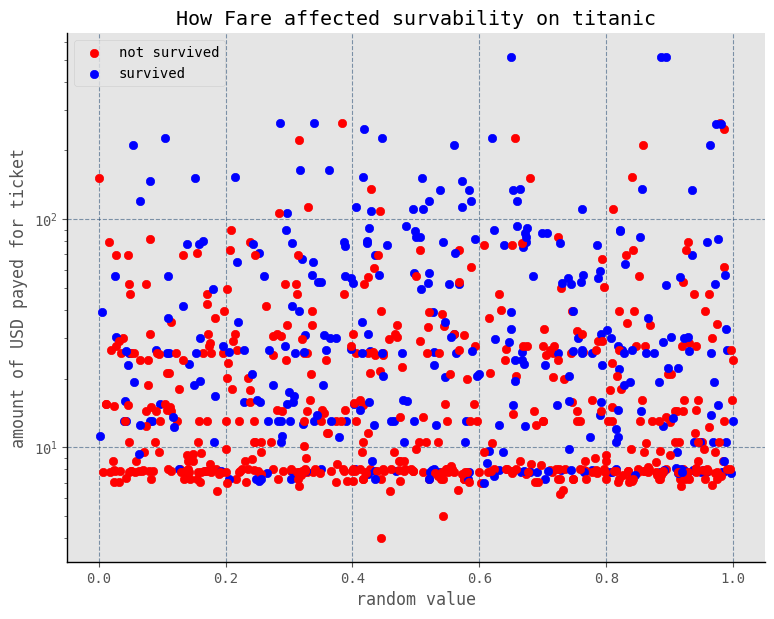

In [398]:
import random

fig, ax = plt.subplots()

for index, row in fare_survived.iterrows():
    survived = row['Survived'] == 1
    fare = row['Fare']
    random_x = random.uniform(0, 1)
    if survived:
        plt.scatter(x=random_x, y=fare, color='blue', label='survived')
    else:
        plt.scatter(x=random_x, y=fare, color='red', label='not survived')
ax.set_yscale('log')
ax.set_xlabel('random value')
ax.set_ylabel('amount of USD payed for ticket')
ax.set_title('How Fare affected survability on titanic')

plt.legend(['not survived', 'survived'])
plt.show()

##Pclass analisis

In [399]:
pclass_survived = train_table[['Pclass', 'Survived']]

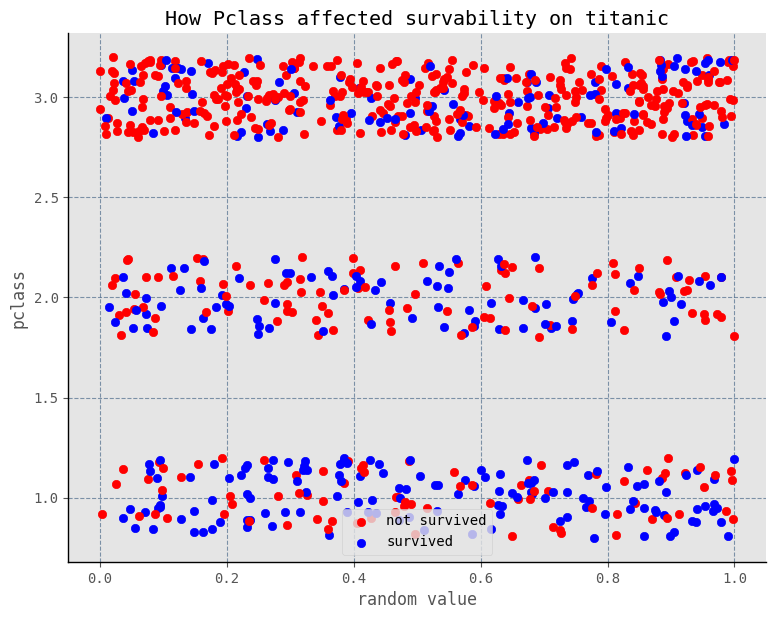

In [400]:
fig, ax = plt.subplots()

for index, row in pclass_survived.iterrows():
    survived = row['Survived'] == 1
    pclass = row['Pclass']
    random_x = random.uniform(0, 1)
    if survived:
        plt.scatter(x=random_x, y=pclass + random.uniform(-.2, .2), color='blue', label='survived')
    else:
        plt.scatter(x=random_x, y=pclass + random.uniform(-.2, .2), color='red', label='not survived')

ax.set_xlabel('random value')
ax.set_ylabel('pclass')
ax.set_title('How Pclass affected survability on titanic')

plt.legend(['not survived', 'survived'])
plt.show()

##CORELATION MATRIX

In [401]:
from typing import Final
NOT_EXISTING_DATA: Final = -1e8

In [413]:
def get_position(input_str: str):
    cabin = input_str
    cabin = cabin.replace(" ", "")
    if not cabin:
        return -1
    if cabin[0] in ["G", "E"]:
        cabin = cabin[1:]
    number_of_characters_eaten = 0
    initial_cabin_length = len(cabin)
    operated = cabin
    while not operated.isnumeric():
        if number_of_characters_eaten >= initial_cabin_length:
            assert(False)

        operated = operated[0: -1]

        number_of_characters_eaten += 1
    return int(operated)

def extract_location_from_cabin(cabin: str) -> dict:
    dec_level = {"A" : 7, "B" : 6, "C" : 5, "D" : 4, "E" : 3, "F" : 2, "G" : 1, "T" : 0}
    dec = dec_level[cabin[0]]
    position = get_position(cabin[1:])

    return {'dec' : dec, 'position' : position}

def extract_location_from_concatenated_location(location_concatenated: pd.DataFrame)->list:
    output = list()
    for row in location_concatenated:
        output_row = dict()
        
        if pd.isna(row):
            output_row = {'dec' : None, 'position' : None}
        else:
            output_row = extract_location_from_cabin(row)
        
        output.append(output_row)
    return output

def extract_embarked_as_float(embarked: pd.DataFrame) -> list:
    output = list()
    translation = {'C': 1, 'Q': 0, 'S' : 2.}
    for row in embarked:
        if pd.isna(row):
            output.append(NOT_EXISTING_DATA)
        else:
            output.append(translation[row])
    return output

In [428]:
sexes = train_table.Sex=='male'
sexes = sexes.astype('float16')

survived = train_table.Survived.astype('float16')
age = train_table.Age.astype('float16')
young_age = train_table.Age<=8
young_age = young_age.astype('float16')

has_cabin = train_table.Cabin.notna()
has_cabin = has_cabin.astype('float16')

fare = train_table.Fare.astype('float16')
pclass = train_table.Pclass.astype('float16')

parch = train_table.Parch.astype('float16')
sib_sp = train_table.SibSp.astype('float16')

embarked_list = extract_embarked_as_float(train_table.Embarked)
embarked = pd.DataFrame(embarked_list).astype('float16')

location_concatenated = train_table.Cabin
extracted_locations = extract_location_from_concatenated_location(location_concatenated)
locations = pd.DataFrame(extracted_locations)

,0
0,2.0
1,1.0
2,2.0
3,2.0
4,2.0
...,...
95,2.0
96,1.0
97,1.0
98,2.0


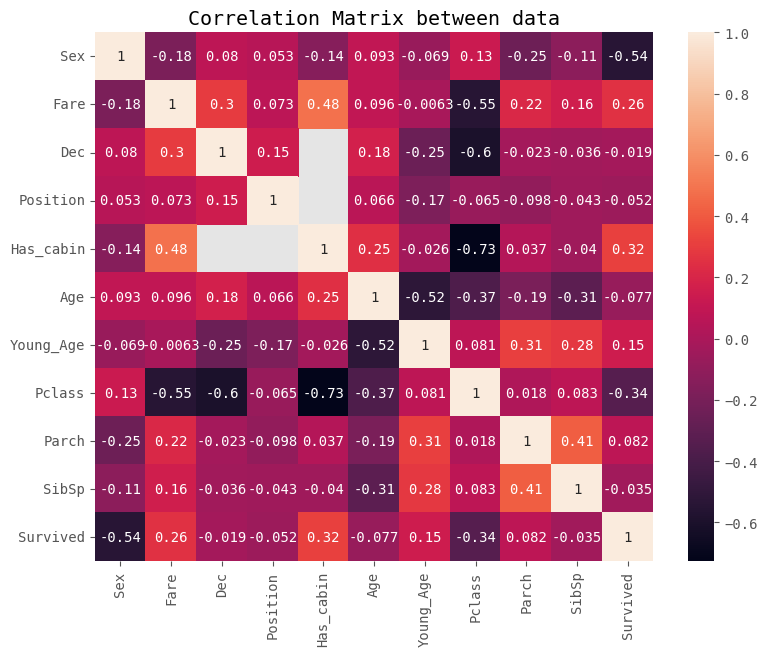

In [429]:

import seaborn as sn

correlation_matrix_table = {
    'Sex' : sexes.to_dict(),
    'Fare' : fare.to_dict(),
    'Dec' : locations.dec.to_dict(),
    'Position' : locations.position.to_dict(),
    'Has_cabin' : has_cabin.to_dict(),
    'Age' : age.to_dict(),
    'Young_Age': young_age.to_dict(),
    'Pclass' : pclass.to_dict(),
    'Parch' : parch.to_dict(),
    'Embarked' : embarked.to_dict(),
    'SibSp' : sib_sp.to_dict(),
    'Survived' : survived.to_dict()}

correlation_matrix = pd.DataFrame(correlation_matrix_table)
corr_matrix = correlation_matrix.corr()

sn.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix between data')
plt.show()


#MODEL DEVELOPMENT

##Utilities

In [ ]:
import tensorflow as tf
from typing import Final

In [431]:
tensor_table = {
    'Sex' : sexes.to_dict(),
    'Fare' : fare.to_dict(),
    'Has_cabin' : has_cabin.to_dict(),
    'Young_Age': young_age.to_dict(),
    'Pclass' : pclass.to_dict(),
    'Parch' : parch.to_dict(),
    'Survived' : survived.to_dict()}

tensor = pd.DataFrame(tensor_table)

validation_table = tensor.sample(frac=0.15)



In [ ]:
train_table.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data extraction

In [ ]:
sexes = train_table.Sex=='male'
sexes = sexes.astype('float16')
survived = train_table.Survived.astype('float16')
age = train_table.Age.astype('float16')
location_concatenated = train_table.Cabin
fare = train_table.Fare.astype('float16')
pclass = train_table.Pclass.astype('float16')

## Joining Data Together

In [ ]:
tensor_table = {
    'Sex' : sexes.to_dict(),
    'Fare' : fare.to_dict(),
    'Pclass' : pclass.to_dict()
   }


In [ ]:
training_tensor_table.fillna(NOT_EXISTING_DATA, inplace=True)
validation_tensor_table.fillna(NOT_EXISTING_DATA, inplace=True)
training_tensor_table.head()

,Sex,Fare,Age,Pclass,Survived
0,1.0,7.250000,22.0,3.0,0.0
2,0.0,7.925781,26.0,3.0,1.0
3,0.0,53.093750,35.0,1.0,1.0
4,1.0,8.046875,35.0,3.0,0.0
5,1.0,8.460938,0.0,3.0,0.0


## Tensor creation

In [ ]:
import tensorflow as tf

In [ ]:
training_tensor_table.head()

,Sex,Fare,Dec,Position,Age,Pclass,Survived
0,1.0,7.250000,-100000000.0,-100000000.0,22.0,3.0,0.0
1,0.0,71.312500,5.0,85.0,38.0,1.0,1.0
5,1.0,8.460938,-100000000.0,-100000000.0,-100000000.0,3.0,0.0
6,1.0,51.875000,3.0,46.0,54.0,1.0,0.0
7,1.0,21.078125,-100000000.0,-100000000.0,2.0,3.0,0.0


In [ ]:
# train_tensor = tf.convert_to_tensor(training_tensor_table)
# validation_tensor = tf.convert_to_tensor(training_tensor_table)
# train_tensor
train_labels = training_tensor_table.pop('Survived')
validation_labels = validation_tensor_table.pop('Survived')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1, name="normalization_layer")
normalizer.adapt(training_tensor_table)

In [ ]:
def get_model():
    input_layer = tf.keras.Input(shape=(4), name="input_layer")
    normalization_layer = normalizer(input_layer)
    dense_1st = tf.keras.layers.Dense(8, activation='ReLU', name="dense_1st")(normalization_layer)
    output = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid, name="output")(dense_1st)

    model = tf.keras.models.Model(input_layer, output)
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")])

    model._name = "Prototype_model"
    return model

model = get_model()
model.summary()

Model: "Prototype_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 normalization_layer (Normal  (None, 4)                9         
 ization)                                                        
                                                                 
 dense_1st (Dense)           (None, 8)                 40        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 58
Trainable params: 49
Non-trainable params: 9
_________________________________________________________________


In [ ]:
EPOCHS = 100
SHUFFLE_BUFFER = 500
BATCH_SIZE = 16

train_labels.head()

checkpoint_filepath = 'model_epoch_{epoch:02d}_precision_{val_precision:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_precision',
    mode='max',
    save_best_only=True)

history = model.fit(x=training_tensor_table,
                    y=train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_data=(validation_tensor_table, validation_labels),
                    callbacks=[model_checkpoint_callback])

Epoch 1/100
48/48 [==============================] - 1s 11ms/step - loss: 0.7253 - accuracy: 0.4201 - precision: 0.3944 - recall: 0.9895 - val_loss: 0.6843 - val_accuracy: 0.5373 - val_precision: 0.4673 - val_recall: 0.9091
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5733 - precision: 0.4681 - recall: 0.9199 - val_loss: 0.6499 - val_accuracy: 0.6194 - val_precision: 0.5227 - val_recall: 0.8364
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.6248 - precision: 0.5030 - recall: 0.8850 - val_loss: 0.6203 - val_accuracy: 0.6493 - val_precision: 0.5488 - val_recall: 0.8182
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.6183 - accuracy: 0.7199 - precision: 0.5904 - recall: 0.8537 - val_loss: 0.5962 - val_accuracy: 0.7313 - val_precision: 0.6418 - val_recall: 0.7818
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.5954 - accuracy: 0.7556 - precis

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


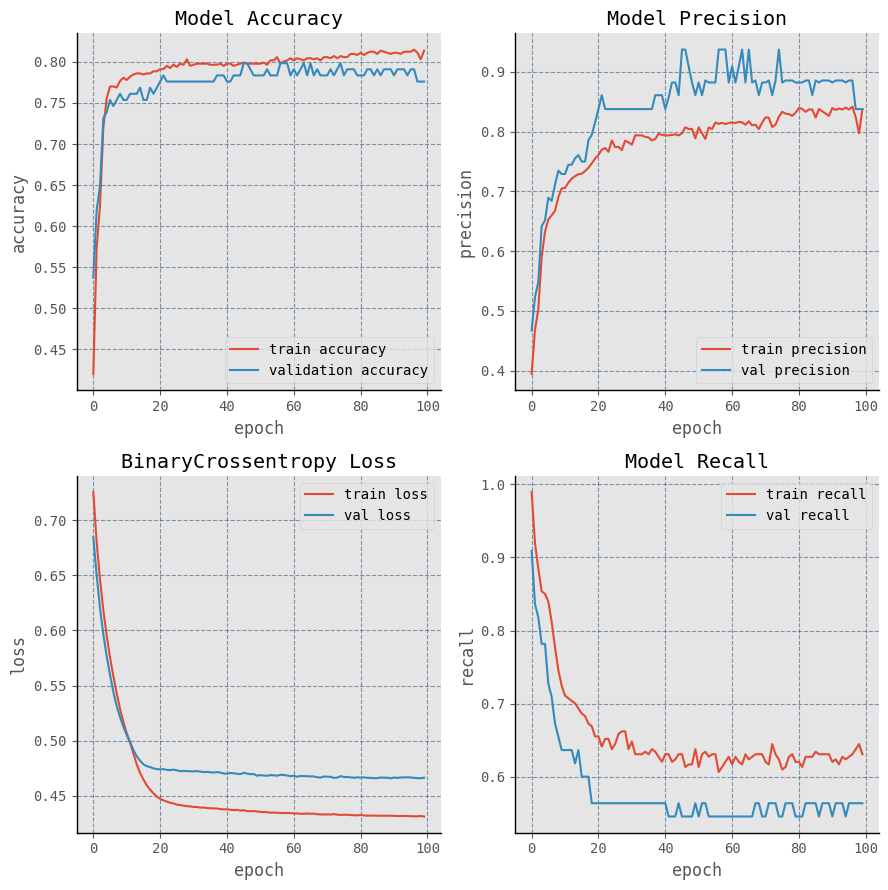

In [ ]:
print(history.history.keys())
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

ax1 = axs[0][0]
ax1.set_title("Model Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")
ax1.plot(acc, label='train accuracy')
ax1.plot(val_acc, label='validation accuracy')
ax1.legend(loc="lower right")


loss = history.history['loss']
val_loss = history.history['val_loss']

ax2 = axs[1][0]
ax2.set_title("BinaryCrossentropy Loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("loss")
ax2.plot(loss, label='train loss')
ax2.plot(val_loss, label='val loss')
ax2.legend(loc="upper right")

precision = history.history['precision']
val_precision = history.history['val_precision']

ax3 = axs[0][1]
ax3.set_title("Model Precision")
ax3.set_xlabel("epoch")
ax3.set_ylabel("precision")
ax3.plot(precision, label='train precision')
ax3.plot(val_precision, label='val precision')
ax3.legend(loc="lower right")

recall = history.history['recall']
val_recall = history.history['val_recall']

ax4 = axs[1][1]
ax4.set_title("Model Recall")
ax4.set_xlabel("epoch")
ax4.set_ylabel("recall")
ax4.plot(recall, label='train recall')
ax4.plot(val_recall, label='val recall')
ax4.legend(loc="upper right")

plt.tight_layout()
plt.show()


Model: "Prototype_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 6)]               0         
                                                                 
 normalization_layer (Normal  (None, 6)                13        
 ization)                                                        
                                                                 
 dense_1st (Dense)           (None, 8)                 56        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 78
Trainable params: 0
Non-trainable params: 78
_________________________________________________________________


#FINAL SUBMISSION 

##Model Loading

In [ ]:
final_model = tf.keras.models.load_model("good_models/model_epoch_10_precision_0.91.h5")
final_model.trainable = False
final_model.summary()

